# Task 3: Monthly Spending Prediciton

In this task, we will have to predict the amount of user spending per month using regression model.

In [2]:
import pandas as pd
import numpy as np
import joblib
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split



## Step 1: Data Preparation

In [2]:
df = pd.read_csv("task3/train.csv")

df.head()

,id,player_id,friend_count,social_interactions,guild_membership,event_participation_rate,daily_login_streak,avg_session_length,sessions_per_week,total_playtime_hours,...,purchase_frequency,payment_methods_used,purchases_on_discount,discount_rate_used,seasonal_spending_pattern,owns_limited_edition,competitive_rank,tournament_participation,segment,spending_30d
0,PLY00001,P007453,140.0,39.0,NaN,35.495321,86.0,94.186687,20.660400,793.043827,...,NaN,1.0,1.0,0.250000,4.0,NaN,7.0,1.0,1.0,0.00
1,PLY00002,P120776,126.0,12.0,1.0,35.222611,27.0,76.694036,15.112974,836.397667,...,11.193590,1.0,25.0,0.581395,5.0,0.0,3.0,0.0,1.0,0.00
2,PLY00003,P083055,157.0,63.0,1.0,54.291374,1.0,66.680997,13.770480,561.212807,...,5.175272,3.0,27.0,0.551020,7.0,0.0,5.0,0.0,1.0,0.00
3,PLY00004,P087827,89.0,96.0,1.0,52.990011,74.0,75.864572,11.941930,NaN,...,10.374656,2.0,22.0,0.536585,6.0,0.0,9.0,0.0,2.0,2223.70
4,PLY00005,P045133,159.0,80.0,0.0,78.586509,84.0,33.774836,1.405901,617.041867,...,NaN,3.0,11.0,0.261905,0.0,1.0,4.0,0.0,3.0,156634.22


In [3]:
df.isnull().sum()

,0
id,0
player_id,0
friend_count,6046
social_interactions,6106
guild_membership,6028
event_participation_rate,6001
daily_login_streak,6107
avg_session_length,6028
sessions_per_week,6162
total_playtime_hours,6132


In [4]:
df.dtypes

,0
id,object
player_id,object
friend_count,float64
social_interactions,float64
guild_membership,float64
event_participation_rate,float64
daily_login_streak,float64
avg_session_length,float64
sessions_per_week,float64
total_playtime_hours,float64


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
friend_count,97954.0,110.807808,65.428794,0.000000,60.000000,106.000000,155.000000,396.000000
social_interactions,97894.0,65.950048,37.994117,0.000000,36.000000,64.000000,92.000000,257.000000
guild_membership,97972.0,0.598355,0.490233,0.000000,0.000000,1.000000,1.000000,1.000000
event_participation_rate,97999.0,39.560263,18.466553,10.000034,25.371582,36.051588,52.955168,84.998193
daily_login_streak,97893.0,56.803357,35.726540,0.000000,28.000000,54.000000,81.000000,227.000000
avg_session_length,97972.0,110.275648,54.933788,20.005037,66.829061,105.664336,147.207074,365.836226
sessions_per_week,97838.0,14.261798,7.566377,1.001231,8.422158,13.866458,19.430879,47.415109
total_playtime_hours,97868.0,595.330260,293.774141,50.011515,374.969169,584.461687,795.347685,1990.852714
days_since_last_login,97960.0,7.341601,5.478538,0.000147,2.953816,6.242609,10.619451,40.338397
achievement_count,97989.0,161.517803,81.120208,0.000000,102.000000,160.000000,217.000000,512.000000


check if some value need to be categorical instead

In [6]:
df['competitive_rank'].value_counts()

,count
competitive_rank,
6.0,18786
5.0,18452
7.0,15100
4.0,14157
8.0,9342
3.0,8783
9.0,4643
2.0,4167
10.0,2454


In [7]:
df['owns_limited_edition'].value_counts()

,count
owns_limited_edition,
0.0,87572
1.0,10353


In [8]:
df['segment'].value_counts()

,count
segment,
0.0,39176
1.0,24646
2.0,19567
3.0,14542


In [18]:
categorical_cols = ['segment', 'owns_limited_edition', 'competitive_rank']

These three are should be storing as a categorical data instead, so we will use other method to filled the missing value for it

### Step 1.2: Missing value

Drop unnecessary data

In [10]:
df.drop(['id', 'player_id'], axis = 1, inplace = True)
df.head()

,friend_count,social_interactions,guild_membership,event_participation_rate,daily_login_streak,avg_session_length,sessions_per_week,total_playtime_hours,days_since_last_login,achievement_count,...,purchase_frequency,payment_methods_used,purchases_on_discount,discount_rate_used,seasonal_spending_pattern,owns_limited_edition,competitive_rank,tournament_participation,segment,spending_30d
0,140.0,39.0,NaN,35.495321,86.0,94.186687,20.660400,793.043827,6.918242,375.0,...,NaN,1.0,1.0,0.250000,4.0,NaN,7.0,1.0,1.0,0.00
1,126.0,12.0,1.0,35.222611,27.0,76.694036,15.112974,836.397667,3.514021,111.0,...,11.193590,1.0,25.0,0.581395,5.0,0.0,3.0,0.0,1.0,0.00
2,157.0,63.0,1.0,54.291374,1.0,66.680997,13.770480,561.212807,1.863368,82.0,...,5.175272,3.0,27.0,0.551020,7.0,0.0,5.0,0.0,1.0,0.00
3,89.0,96.0,1.0,52.990011,74.0,75.864572,11.941930,NaN,5.973982,122.0,...,10.374656,2.0,22.0,0.536585,6.0,0.0,9.0,0.0,2.0,2223.70
4,159.0,80.0,0.0,78.586509,84.0,33.774836,1.405901,617.041867,5.570188,189.0,...,NaN,3.0,11.0,0.261905,0.0,1.0,4.0,0.0,3.0,156634.22


Drop all null target (In this case there is none)

In [11]:
df['spending_30d'].dropna(inplace = True)

#### Step 1.2.1: Split data into categorical and numerical

For the numerical data we will be using Multiple Imputation by Chained Equations (MICE) as a method for filling the missing value

In [12]:
df_num = df.drop(categorical_cols, axis = 1)

df_num.drop('spending_30d', axis = 1, inplace = True)

df_num

,friend_count,social_interactions,guild_membership,event_participation_rate,daily_login_streak,avg_session_length,sessions_per_week,total_playtime_hours,days_since_last_login,achievement_count,...,games_played,cross_game_activity,platform,days_since_last_purchase,purchase_frequency,payment_methods_used,purchases_on_discount,discount_rate_used,seasonal_spending_pattern,tournament_participation
0,140.0,39.0,NaN,35.495321,86.0,94.186687,20.660400,793.043827,6.918242,375.0,...,4.0,27.0,0.0,11.375597,NaN,1.0,1.0,0.250000,4.0,1.0
1,126.0,12.0,1.0,35.222611,27.0,76.694036,15.112974,836.397667,3.514021,111.0,...,1.0,10.0,1.0,38.325987,11.193590,1.0,25.0,0.581395,5.0,0.0
2,157.0,63.0,1.0,54.291374,1.0,66.680997,13.770480,561.212807,1.863368,82.0,...,2.0,16.0,2.0,21.426924,5.175272,3.0,27.0,0.551020,7.0,0.0
3,89.0,96.0,1.0,52.990011,74.0,75.864572,11.941930,NaN,5.973982,122.0,...,1.0,7.0,0.0,28.915478,10.374656,2.0,22.0,0.536585,6.0,0.0
4,159.0,80.0,0.0,78.586509,84.0,33.774836,1.405901,617.041867,5.570188,189.0,...,2.0,NaN,1.0,13.011954,NaN,3.0,11.0,0.261905,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103995,81.0,54.0,1.0,67.570582,105.0,36.785310,6.671382,860.003706,7.762639,131.0,...,2.0,11.0,1.0,7.544564,NaN,1.0,3.0,0.428571,1.0,0.0
103996,117.0,62.0,1.0,32.805233,79.0,151.619561,6.211211,173.501198,11.287810,249.0,...,5.0,21.0,0.0,34.793927,7.204170,1.0,6.0,0.260870,NaN,0.0
103997,217.0,4.0,1.0,11.347544,73.0,61.428907,7.193119,691.056362,19.752612,221.0,...,1.0,NaN,1.0,27.054709,NaN,2.0,5.0,0.454545,2.0,0.0
103998,89.0,NaN,1.0,17.576616,68.0,54.914447,6.288369,362.560021,3.407455,261.0,...,5.0,44.0,1.0,20.222724,11.241424,1.0,4.0,0.266667,3.0,0.0


In [13]:
df_mice = df_num.copy(deep=True)

mice_imputer = IterativeImputer()

df_mice = mice_imputer.fit_transform(df_mice)

/usr/local/lib/python3.12/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [14]:
df_num_filled = pd.DataFrame(df_mice, columns = df_num.columns)

df_num_filled.head()

,friend_count,social_interactions,guild_membership,event_participation_rate,daily_login_streak,avg_session_length,sessions_per_week,total_playtime_hours,days_since_last_login,achievement_count,...,games_played,cross_game_activity,platform,days_since_last_purchase,purchase_frequency,payment_methods_used,purchases_on_discount,discount_rate_used,seasonal_spending_pattern,tournament_participation
0,140.0,39.0,0.597113,35.495321,86.0,94.186687,20.660400,793.043827,6.918242,375.0,...,4.0,27.000000,0.0,11.375597,14.494761,1.0,1.0,0.250000,4.0,1.0
1,126.0,12.0,1.000000,35.222611,27.0,76.694036,15.112974,836.397667,3.514021,111.0,...,1.0,10.000000,1.0,38.325987,11.193590,1.0,25.0,0.581395,5.0,0.0
2,157.0,63.0,1.000000,54.291374,1.0,66.680997,13.770480,561.212807,1.863368,82.0,...,2.0,16.000000,2.0,21.426924,5.175272,3.0,27.0,0.551020,7.0,0.0
3,89.0,96.0,1.000000,52.990011,74.0,75.864572,11.941930,631.728667,5.973982,122.0,...,1.0,7.000000,0.0,28.915478,10.374656,2.0,22.0,0.536585,6.0,0.0
4,159.0,80.0,0.000000,78.586509,84.0,33.774836,1.405901,617.041867,5.570188,189.0,...,2.0,15.947015,1.0,13.011954,14.131483,3.0,11.0,0.261905,0.0,0.0


For categorical data, we will filling them with the mode of each columns

In [15]:
df_cat = df[categorical_cols]

df_cat

,segment,owns_limited_edition,competitive_rank
0,1.0,NaN,7.0
1,1.0,0.0,3.0
2,1.0,0.0,5.0
3,2.0,0.0,9.0
4,3.0,1.0,4.0
...,...,...,...
103995,2.0,0.0,5.0
103996,0.0,0.0,7.0
103997,NaN,0.0,8.0
103998,NaN,0.0,5.0


In [16]:
for i in df_cat:
    df_cat[i].fillna(df[i].mode()[0], inplace = True)

df_cat.isnull().sum()

/tmp/ipython-input-1704646831.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cat[i].fillna(df[i].mode()[0], inplace = True)
/tmp/ipython-input-1704646831.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat[i].fillna(df[i].mode()[0], inplace = True)


,0
segment,0
owns_limited_edition,0
competitive_rank,0


In [17]:
df_filled = pd.concat([df_cat, df_num_filled, df['spending_30d']], axis = 1)

df_filled.head()

,segment,owns_limited_edition,competitive_rank,friend_count,social_interactions,guild_membership,event_participation_rate,daily_login_streak,avg_session_length,sessions_per_week,...,cross_game_activity,platform,days_since_last_purchase,purchase_frequency,payment_methods_used,purchases_on_discount,discount_rate_used,seasonal_spending_pattern,tournament_participation,spending_30d
0,1.0,0.0,7.0,140.0,39.0,0.597113,35.495321,86.0,94.186687,20.660400,...,27.000000,0.0,11.375597,14.494761,1.0,1.0,0.250000,4.0,1.0,0.00
1,1.0,0.0,3.0,126.0,12.0,1.000000,35.222611,27.0,76.694036,15.112974,...,10.000000,1.0,38.325987,11.193590,1.0,25.0,0.581395,5.0,0.0,0.00
2,1.0,0.0,5.0,157.0,63.0,1.000000,54.291374,1.0,66.680997,13.770480,...,16.000000,2.0,21.426924,5.175272,3.0,27.0,0.551020,7.0,0.0,0.00
3,2.0,0.0,9.0,89.0,96.0,1.000000,52.990011,74.0,75.864572,11.941930,...,7.000000,0.0,28.915478,10.374656,2.0,22.0,0.536585,6.0,0.0,2223.70
4,3.0,1.0,4.0,159.0,80.0,0.000000,78.586509,84.0,33.774836,1.405901,...,15.947015,1.0,13.011954,14.131483,3.0,11.0,0.261905,0.0,0.0,156634.22


# Step 2: Training Preparation

In [18]:
X = df_filled.drop(['spending_30d'], axis = 1)

X.head()

,segment,owns_limited_edition,competitive_rank,friend_count,social_interactions,guild_membership,event_participation_rate,daily_login_streak,avg_session_length,sessions_per_week,...,games_played,cross_game_activity,platform,days_since_last_purchase,purchase_frequency,payment_methods_used,purchases_on_discount,discount_rate_used,seasonal_spending_pattern,tournament_participation
0,1.0,0.0,7.0,140.0,39.0,0.597113,35.495321,86.0,94.186687,20.660400,...,4.0,27.000000,0.0,11.375597,14.494761,1.0,1.0,0.250000,4.0,1.0
1,1.0,0.0,3.0,126.0,12.0,1.000000,35.222611,27.0,76.694036,15.112974,...,1.0,10.000000,1.0,38.325987,11.193590,1.0,25.0,0.581395,5.0,0.0
2,1.0,0.0,5.0,157.0,63.0,1.000000,54.291374,1.0,66.680997,13.770480,...,2.0,16.000000,2.0,21.426924,5.175272,3.0,27.0,0.551020,7.0,0.0
3,2.0,0.0,9.0,89.0,96.0,1.000000,52.990011,74.0,75.864572,11.941930,...,1.0,7.000000,0.0,28.915478,10.374656,2.0,22.0,0.536585,6.0,0.0
4,3.0,1.0,4.0,159.0,80.0,0.000000,78.586509,84.0,33.774836,1.405901,...,2.0,15.947015,1.0,13.011954,14.131483,3.0,11.0,0.261905,0.0,0.0


In [19]:
y = df_filled['spending_30d']

y

,spending_30d
0,0.00
1,0.00
2,0.00
3,2223.70
4,156634.22
...,...
103995,2566.70
103996,527.04
103997,0.00
103998,0.00


Check if y are normally distributed

(array([9.2551e+04, 4.4150e+03, 3.2980e+03, 1.7930e+03, 9.4400e+02,
        4.3800e+02, 2.2600e+02, 1.5200e+02, 8.2000e+01, 1.0100e+02]),
 array([     0.,  30000.,  60000.,  90000., 120000., 150000., 180000.,
        210000., 240000., 270000., 300000.]),
 <BarContainer object of 10 artists>)

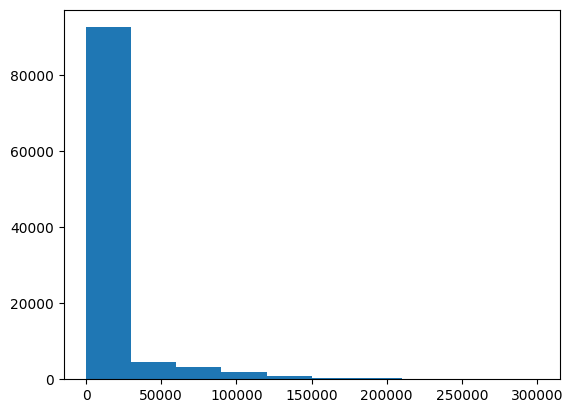

In [20]:
import matplotlib.pyplot as plt
plt.hist(y)

Since the data are clearly not normally distributed we will do the log transformation for it

(array([50198.,   208.,   740.,  3196.,  8394., 11573., 14631.,  2772.,
         8110.,  4178.]),
 array([ 0.        ,  1.26115411,  2.52230822,  3.78346233,  5.04461643,
         6.30577054,  7.56692465,  8.82807876, 10.08923287, 11.35038698,
        12.61154109]),
 <BarContainer object of 10 artists>)

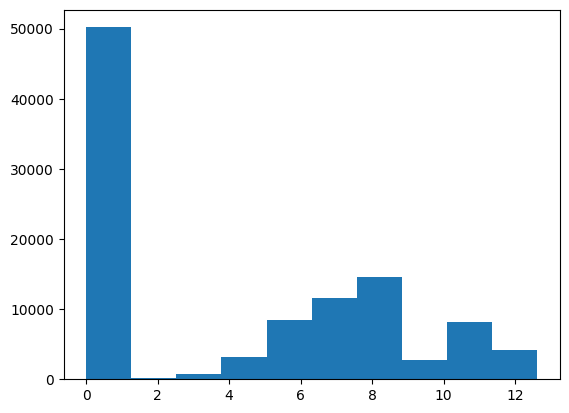

In [21]:
y_transformed = np.log1p(y)

plt.hist(y_transformed)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size = 0.2, random_state= 123)

X_train.shape

(83200, 32)

# Step 3: Modeling

In [5]:
from sklego.meta import ZeroInflatedRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb


In [ ]:
param_grid = {
    'max_depth': [6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}


xgb_classifier = GridSearchCV(estimator=xgb.XGBRegressor(
                    n_estimators = 2000,
                    reg_alpha = 0.1,
                    reg_lambda = 1,
                    gamma = 0.9
                    ),
                    param_grid = param_grid,
                    n_jobs=-1,
                    cv=3,
                    verbose=2
                            )


In [38]:
reg = ZeroInflatedRegressor(
    classifier = RandomForestClassifier(class_weight='balanced_subsample', max_depth=8,
                                        min_samples_split=7, n_estimators=200, random_state=0),
    regressor = xgb_classifier
)

reg.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


ZeroInflatedRegressor(classifier=RandomForestClassifier(class_weight='balanced_subsample',
                                                        max_depth=8,
                                                        min_samples_split=7,
                                                        n_estimators=200,
                                                        random_state=0),
                      regressor=GridSearchCV(cv=3,
                                             estimator=XGBRegressor(base_score=None,
                                                                    booster=None,
                                                                    callbacks=None,
                                                                    colsample_bylevel=None,
                                                                    colsample_bynode=None,
                                                                    colsample_bytree=None,
                                                                    device=None,
                                                                    early_stopping_rounds...
                                                                    max_cat_threshold=None,
                                                                    max_cat_to_onehot=None,
                                                                    max_delta_step=None,
                                                                    max_depth=None,
                                                                    max_leaves=None,
                                                                    min_child_weight=None,
                                                                    missing=nan,
                                                                    monotone_constraints=None,
                                                                    multi_strategy=None,
                                                                    n_estimators=2000,
                                                                    n_jobs=None,
                                                                    num_parallel_tree=None, ...),
                                             n_jobs=-1,
                                             param_grid={'colsample_bytree': [0.8,
                                                                              1.0],
                                                         'learning_rate': [0.01,
                                                                           0.1,
                                                                           0.2],
                                                         'max_depth': [6, 9],
                                                         'subsample': [0.8,
                                                                       1.0]},
                                             verbose=2))

## Step 4: Evaluation

In [39]:
y_pred = reg.predict(X_test)

y_pred = np.expm1(y_pred)
y_pred

array([1127.63826401,    0.        ,    0.        , ...,    0.        ,
          0.        ,    0.        ])

In [40]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

10545.6823535507

In [41]:
joblib.dump(reg, 'task3/model3.pkl')

['task3/model3.pkl']

## Step 5: Predict test

In [7]:
model = joblib.load('task3/model3.pkl')

/home/mahwayji/storage/kmutt pro/kmutt year 3/Machine learning/CPE342-Karena/venv/lib/python3.12/site-packages/sklearn/base.py:442: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.6.1 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/mahwayji/storage/kmutt pro/kmutt year 3/Machine learning/CPE342-Karena/venv/lib/python3.12/site-packages/sklearn/base.py:442: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.6.1 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/mahwayji/storage/kmutt pro/kmutt year 3/Machine le

In [43]:
df_test = pd.read_csv('task3/test.csv')
df_ans = pd.read_csv('Answer.csv')

df_ans.head()

,id,task1,task2,task3,task4,task5
0,ANS00001,1.0,2,7204.482932,2,0.0
1,ANS00002,0.0,0,4437.066076,0,0.0
2,ANS00003,1.0,0,109102.447463,0,0.0
3,ANS00004,0.0,1,0.000000,0,0.0
4,ANS00005,0.0,0,1300.092167,0,0.0


In [16]:
df_test.drop(['id', 'player_id'], axis = 1 ,inplace = True)

df_test.head()

,friend_count,social_interactions,guild_membership,event_participation_rate,daily_login_streak,avg_session_length,sessions_per_week,total_playtime_hours,days_since_last_login,achievement_count,...,days_since_last_purchase,purchase_frequency,payment_methods_used,purchases_on_discount,discount_rate_used,seasonal_spending_pattern,owns_limited_edition,competitive_rank,tournament_participation,segment
0,177.0,71.0,0.0,33.157419,138.0,143.414888,7.151850,1051.879412,10.598046,106.0,...,47.642882,3.579685,3.0,6.0,0.375000,1.0,0.0,10.0,0.0,1.0
1,55.0,99.0,0.0,27.683671,54.0,253.827162,31.460513,433.186064,4.108231,51.0,...,NaN,5.155740,NaN,5.0,0.263158,9.0,0.0,5.0,0.0,1.0
2,28.0,69.0,1.0,75.184955,101.0,114.896217,34.737910,669.426704,0.015370,216.0,...,1.093810,13.880698,4.0,20.0,0.512821,6.0,0.0,5.0,0.0,3.0
3,79.0,78.0,1.0,17.440872,15.0,119.473134,NaN,729.958232,0.616083,180.0,...,11.347458,18.308044,3.0,23.0,0.589744,2.0,0.0,5.0,0.0,0.0
4,121.0,84.0,0.0,52.693562,4.0,176.099045,12.882396,520.605664,3.948152,89.0,...,51.459694,2.587987,2.0,17.0,0.531250,0.0,0.0,6.0,0.0,2.0


Filled missing value

In [33]:
df_test_num = df_test.drop(categorical_cols, axis = 1)
df_test_cat = df_test[categorical_cols]

In [29]:
df_mice = df_test_num.copy(deep=True)

mice_imputer = IterativeImputer()

df_mice = mice_imputer.fit_transform(df_mice)

/home/mahwayji/storage/kmutt pro/kmutt year 3/Machine learning/CPE342-Karena/venv/lib/python3.12/site-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [30]:
df_test_num_filled = pd.DataFrame(df_mice, columns = df_test_num.columns)

df_test_num_filled.head()

,friend_count,social_interactions,guild_membership,event_participation_rate,daily_login_streak,avg_session_length,sessions_per_week,total_playtime_hours,days_since_last_login,achievement_count,...,games_played,cross_game_activity,platform,days_since_last_purchase,purchase_frequency,payment_methods_used,purchases_on_discount,discount_rate_used,seasonal_spending_pattern,tournament_participation
0,177.0,71.0,0.0,33.157419,138.0,143.414888,7.151850,1051.879412,10.598046,106.0,...,4.000000,23.0,1.0,47.642882,3.579685,3.000000,6.0,0.375000,1.0,0.0
1,55.0,99.0,0.0,27.683671,54.0,253.827162,31.460513,433.186064,4.108231,51.0,...,2.000000,14.0,1.0,47.420687,5.155740,1.597962,5.0,0.263158,9.0,0.0
2,28.0,69.0,1.0,75.184955,101.0,114.896217,34.737910,669.426704,0.015370,216.0,...,4.000000,61.0,1.0,1.093810,13.880698,4.000000,20.0,0.512821,6.0,0.0
3,79.0,78.0,1.0,17.440872,15.0,119.473134,13.061810,729.958232,0.616083,180.0,...,2.000000,1.0,1.0,11.347458,18.308044,3.000000,23.0,0.589744,2.0,0.0
4,121.0,84.0,0.0,52.693562,4.0,176.099045,12.882396,520.605664,3.948152,89.0,...,2.727502,26.0,0.0,51.459694,2.587987,2.000000,17.0,0.531250,0.0,0.0


In [35]:
for i in df_test_cat:
    df_test_cat[i].fillna(df_test_cat[i].mode()[0], inplace = True)

df_test_cat.isnull().sum()

/tmp/ipykernel_56342/2980955693.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test_cat[i].fillna(df_test_cat[i].mode()[0], inplace = True)
/tmp/ipykernel_56342/2980955693.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_cat[i].fillna(df_test_cat[i].mode()[0], inplace = True)


segment                 0
owns_limited_edition    0
competitive_rank        0
dtype: int64

In [36]:
df_test_filled = pd.concat([df_test_cat, df_test_num_filled], axis = 1)

Predict value

In [39]:
y_pred = model.predict(df_test_filled)

y_pred = np.expm1(y_pred)

y_pred

array([     0.        ,   1768.23828616, 178031.88991986, ...,
         4924.07247286,      0.        ,   2151.7234088 ], shape=(25889,))

In [44]:
df_ans['task3'] = y_pred

df_ans.head()

,id,task1,task2,task3,task4,task5
0,ANS00001,1.0,2,0.000000,2,0.0
1,ANS00002,0.0,0,1768.238286,0,0.0
2,ANS00003,1.0,0,178031.889920,0,0.0
3,ANS00004,0.0,1,0.000000,0,0.0
4,ANS00005,0.0,0,0.000000,0,0.0


Save the answer

In [46]:
df_ans.to_csv('Answer.csv', index=False)